In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Load the datasets
train_df = pd.read_excel("train_data.xlsx")
test_df = pd.read_excel("test_data.xlsx")

In [3]:
# Handle skewness
skewness = {}
for col in train_df.columns:
    skewness[col] = train_df[col].skew()
    if train_df[col].skew() > 1:
        train_df[col] = train_df[col].apply(np.sqrt)

In [4]:
# Check updated skewness
skewness_1 = {col: train_df[col].skew() for col in train_df.columns}
print(train_df.head())
print(train_df.info())

         FH        DT        EH        LT        CD        TC         MT  \
0  3.286335  0.316228  3.464102  1.303840  2.588436  5.049752  55.753475   
1  4.183300  1.612452  3.449638  1.549193  2.701851  6.033241  23.250806   
2  3.674235  1.000000  4.123106  1.673320  2.792848  5.865151  20.135789   
3  3.478505  0.774597  2.607681  2.792848  1.303840  5.253570  16.440803   
4  3.420526  1.788854  3.114482  1.702939  2.569047  5.394442  49.322409   

           P  
0  28.578488  
1  10.412492  
2   9.588013  
3   4.080441  
4  23.489359  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FH      3099 non-null   float64
 1   DT      3099 non-null   float64
 2   EH      3099 non-null   float64
 3   LT      3099 non-null   float64
 4   CD      3099 non-null   float64
 5   TC      3099 non-null   float64
 6   MT      3099 non-null   float64
 7   P       3

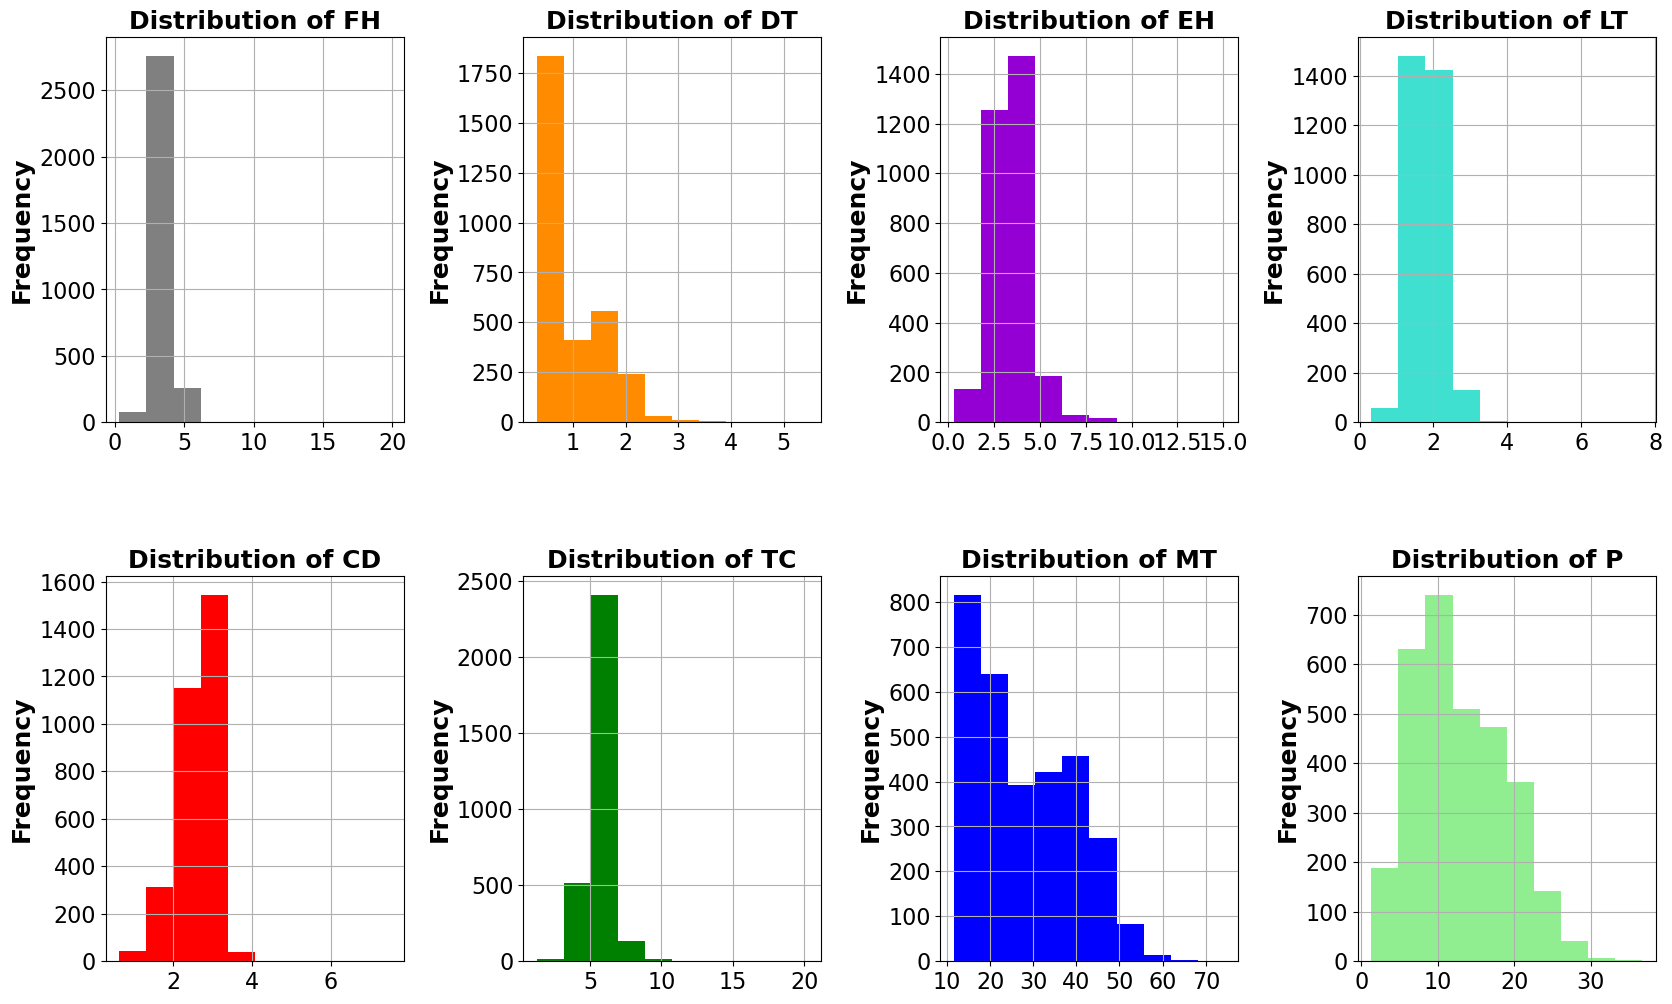

In [8]:
# Univariate analysis
fig = plt.figure(figsize=(20, 12))
colors = ['grey', 'darkorange', 'darkviolet', 'turquoise', 'r', 'g', 'b',
          'lightgreen', 'm', 'y', 'k', 'darkorange', 'lightgreen', 'plum',
          'tan', 'khaki', 'pink', 'skyblue', 'lawngreen', 'salmon']

ticklabels_style = {"fontsize": 16}

for i, column in enumerate(train_df.columns):
    ax = fig.add_subplot(2, 4, i + 1)
    ax.set_xlabel(column, fontsize=18, fontweight='bold')
    ax.set_ylabel('Frequency', fontsize=18, fontweight='bold')
    ax.set_title(f"Distribution of {column}", fontsize=18, fontweight='bold')  # Add column label as title
    train_df[column].plot(kind='hist', color=colors[i % len(colors)], fontsize=18, grid=True, ax=ax)
    plt.xticks(**ticklabels_style)
    plt.yticks(**ticklabels_style)

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Increase spacing for better readability
plt.show()



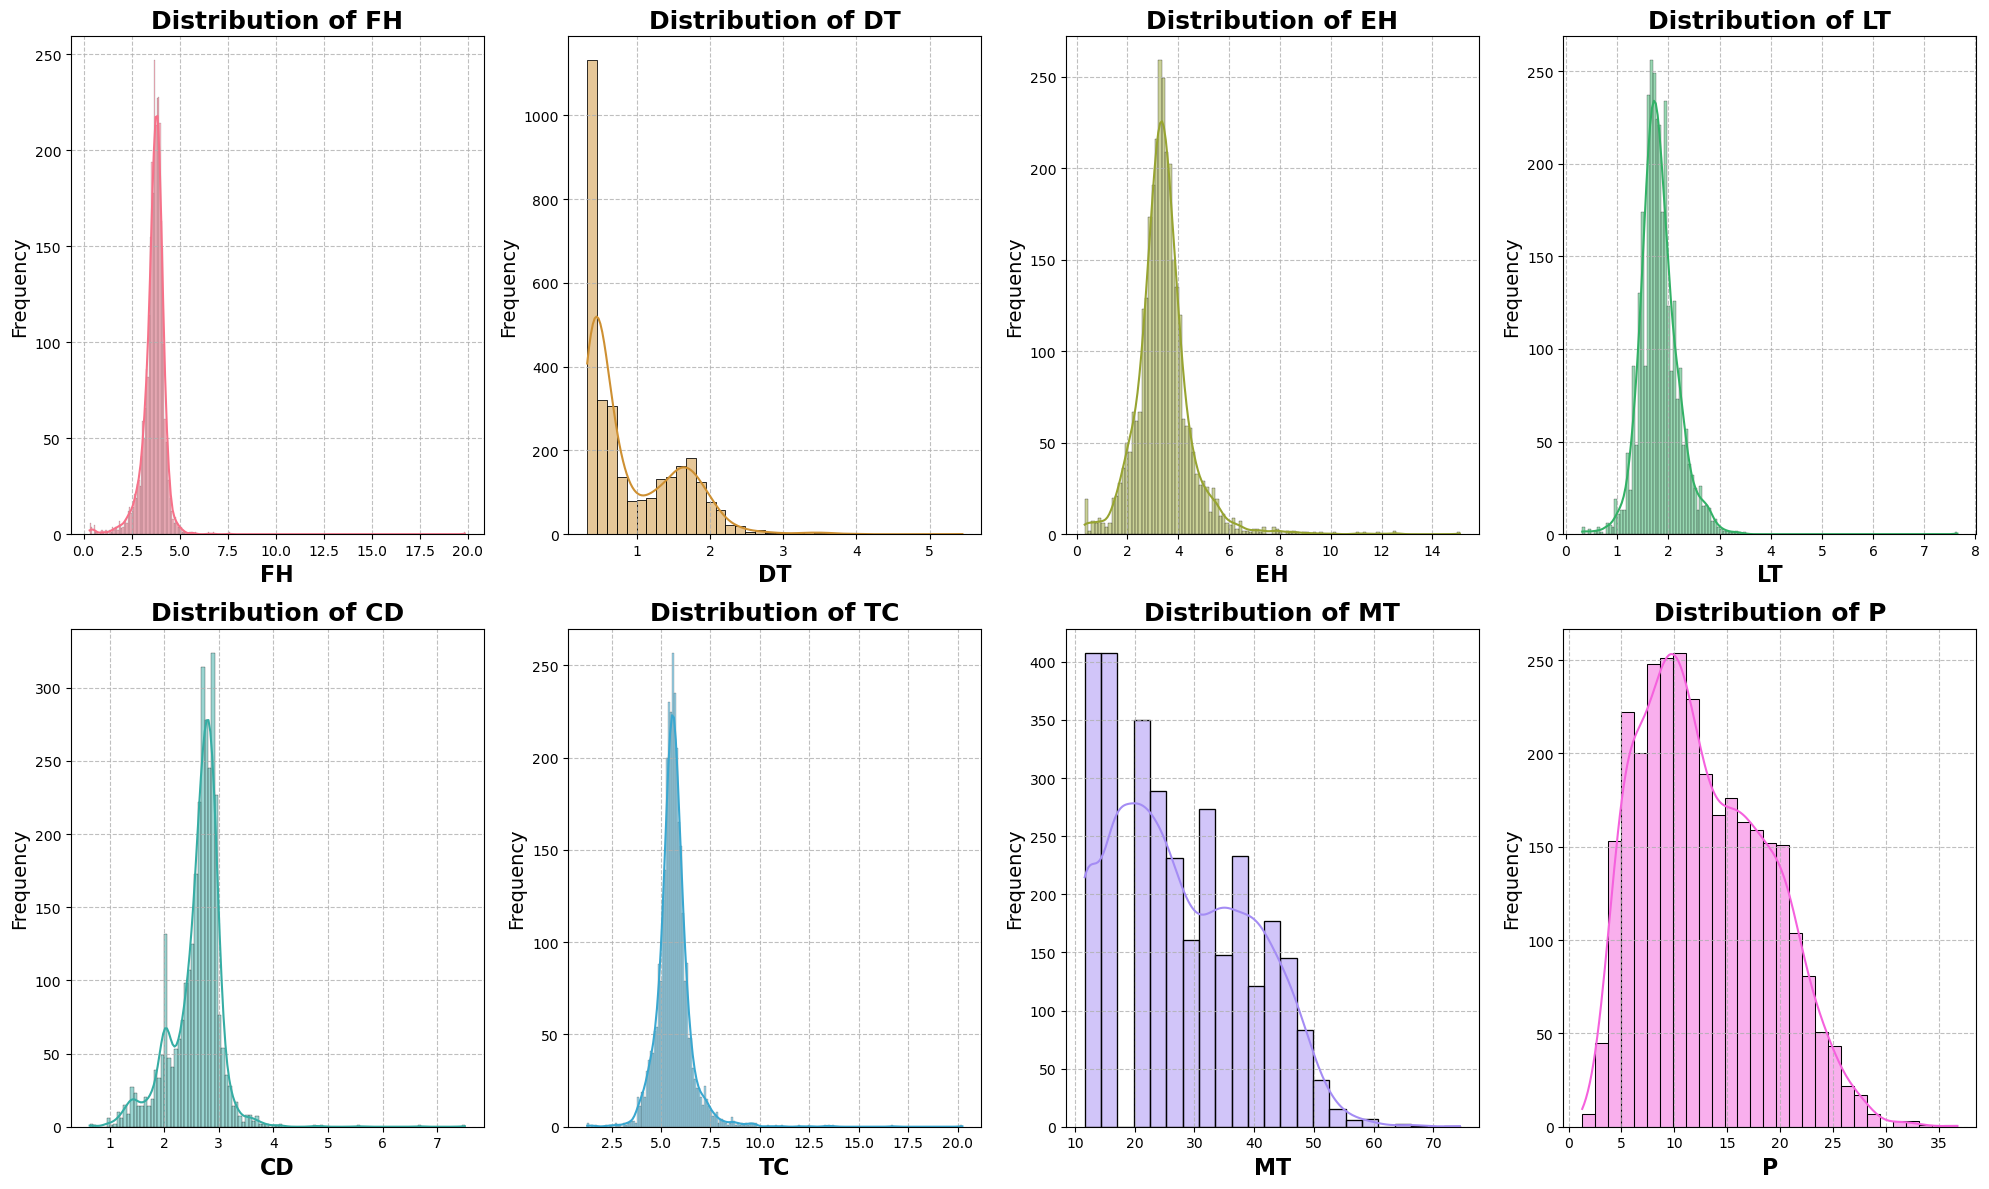

In [7]:
# Define colors dynamically
color_palette = sns.color_palette("husl", len(train_df.columns))

# Plot histograms
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axes = axes.flatten()

for i, column in enumerate(train_df.columns):
    sns.histplot(train_df[column], ax=axes[i], color=color_palette[i], kde=True)
    axes[i].set_xlabel(column, fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Frequency', fontsize=14)
    axes[i].set_title(f"Distribution of {column}", fontsize=18, fontweight='bold')
    axes[i].grid(True, linestyle="--", alpha=0.8)

plt.tight_layout()
plt.savefig(os.path.join('feature_distribution.jpg'), dpi=300, bbox_inches='tight')
plt.show()